##Flowchart
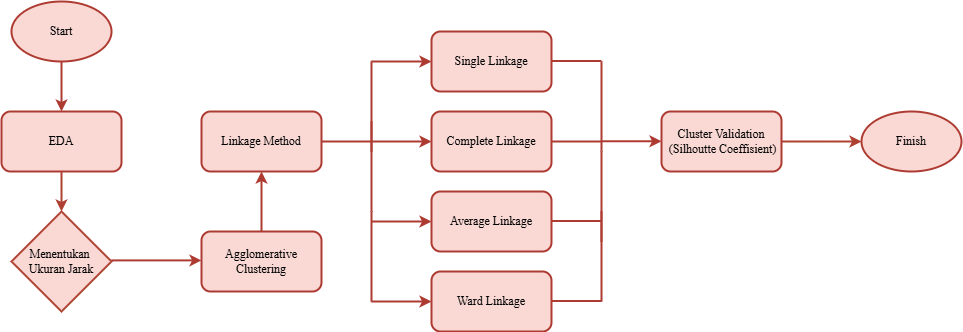

# Import Libraries

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Import Datasets

In [314]:
import os

from google.colab import drive
drive.mount('/content/gdrive')
customer = pd.read_csv("/content/gdrive/My Drive/Analisis Multivariat/clustering.csv")
customer.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   Gender                1000 non-null   object 
 2   Age                   1000 non-null   int64  
 3   Driving_License       1000 non-null   int64  
 4   Region_Code           1000 non-null   float64
 5   Previously_Insured    1000 non-null   int64  
 6   Vehicle_Age           1000 non-null   object 
 7   Vehicle_Damage        1000 non-null   object 
 8   Annual_Premium        1000 non-null   float64
 9   Policy_Sales_Channel  1000 non-null   float64
 10  Vintage               1000 non-null   int64  
 11  Response              1000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory us

#Pre-processing Data

In [315]:
# cuplikan data customer
customer.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,100000,Male,22,1,8.0,0,< 1 Year,Yes,36513.0,160.0,189,0
1,100001,Male,24,1,36.0,0,< 1 Year,Yes,2630.0,160.0,268,0
2,100002,Female,22,1,15.0,0,< 1 Year,Yes,35832.0,152.0,289,0
3,100003,Male,72,1,28.0,0,> 2 Years,Yes,36685.0,26.0,113,0
4,100004,Male,66,1,28.0,0,> 2 Years,Yes,2630.0,45.0,123,1


##Data Cleaning

In [316]:
# checck missing value
customer.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


Tidak ada missing value

In [317]:
# check duplicated id
customer.duplicated(subset="Response").sum()

np.int64(998)

Tidak ada duplicated

In [318]:
# drop kolom karena tidak bermakna
customer_clean = customer.drop(columns=["Response","id","Gender","Driving_License","Region_Code","Previously_Insured"])

In [319]:
# deskripsi statistik
customer_clean.describe()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.653000,30364.102000,108.303000,154.565000
std,15.776929,16348.152121,55.577442,83.320815
min,20.000000,2630.000000,1.000000,10.000000
25%,25.000000,24415.250000,26.000000,88.000000
50%,38.000000,31511.500000,124.000000,154.000000
75%,50.250000,39555.750000,152.000000,227.000000
max,85.000000,100278.000000,163.000000,299.000000


Terdapat perbedaan skala: wajib feature scaling

##Feature Scaling

In [320]:
# minmax scaler sklearn
scaler = MinMaxScaler()
numeric_cols = customer_clean.select_dtypes(include=['int64','float64']).columns
customer_scaled = scaler.fit_transform(customer_clean[numeric_cols])
pd.DataFrame(customer_scaled).describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.302354,0.284021,0.662364,0.500225
std,0.242722,0.167419,0.343071,0.288307
min,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.223100,0.154321,0.269896
50%,0.276923,0.295772,0.759259,0.498270
75%,0.465385,0.378152,0.932099,0.750865
max,1.000000,1.000000,1.000000,1.000000


Menyelaraskan skala data ke rentang [0, 1]

##Visualisasi

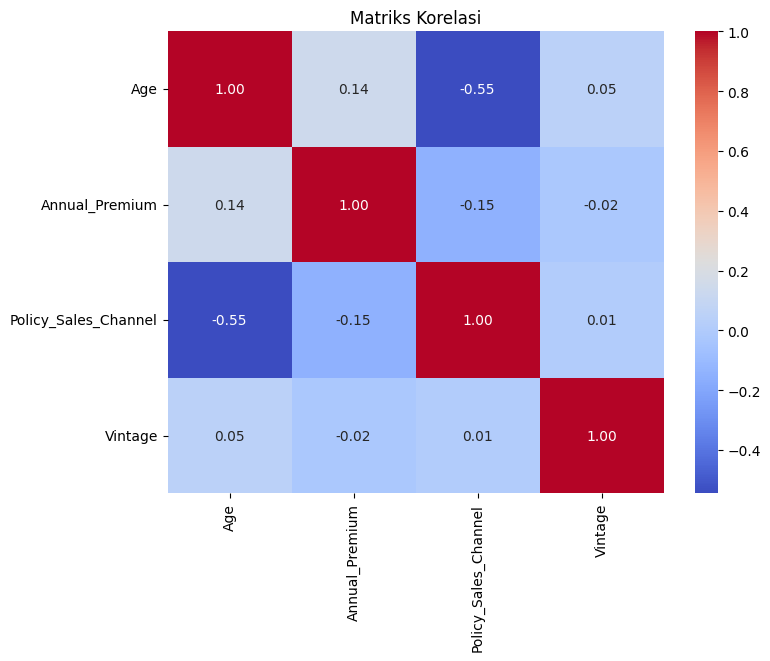

In [321]:
import pandas as pd

# Matriks korelasi
plt.figure(figsize=(8, 6))
customer_scaled_df = pd.DataFrame(customer_scaled, columns=numeric_cols)
sns.heatmap(customer_scaled_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

Matriks korelasi untuk melihat hubungan antar variabel

##Jarak Clustering

In [322]:

# 1. Jarak Euclidean
dist_euclidean = squareform(pdist(customer_scaled, metric='euclidean'))
df_euclidean = pd.DataFrame(dist_euclidean)


# 2. Jarak Manhattan
dist_manhattan = squareform(pdist(customer_scaled, metric='cityblock'))
df_manhattan = pd.DataFrame(dist_manhattan)


# 3. Jarak Canberra
dist_canberra = squareform(pdist(customer_scaled, metric='canberra'))
df_canberra = pd.DataFrame(dist_canberra)

# Tampilkan hasil
print("Jarak Euclidean:\n", df_euclidean)
print("\nJarak Manhattan:\n", df_manhattan)
print("\nJarak Canberra:\n", df_canberra)

Jarak Euclidean:
           0         1         2         3         4         5         6    \
0    0.000000  0.442802  0.349596  1.159771  1.065226  0.932927  0.349137   
1    0.442802  0.000000  0.352530  1.280156  1.083131  0.920450  0.281899   
2    0.349596  0.352530  0.000000  1.252041  1.157591  0.839157  0.076763   
3    1.159771  1.280156  1.252041  0.000000  0.380923  0.728261  1.230745   
4    1.065226  1.083131  1.157591  0.380923  0.000000  0.715871  1.115808   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.422939  0.466240  0.435703  0.964816  0.861183  0.795193  0.398562   
996  0.985097  1.101015  1.006233  0.376785  0.548205  0.403295  0.997806   
997  0.171694  0.304474  0.212538  1.170282  1.052168  0.850478  0.192783   
998  0.497052  0.620491  0.478360  0.836543  0.815370  0.640465  0.468750   
999  0.183031  0.517337  0.396510  1.041884  0.978677  0.882272  0.394653   

          7         8         9    ...       990       99

# Agglomerative Clustering

#Linkage Method

##Single Linkage

In [323]:
# train agglomerative clustering with 5 clusters, linkage="single"
from sklearn.cluster import AgglomerativeClustering
agg_clus_single = AgglomerativeClustering(n_clusters=2,linkage="single")
agg_clus_single.fit(customer_scaled)

AgglomerativeClustering(linkage='single')

Hierarchical clustering dilakukan dengan metode single linkage (berdasarkan jarak terdekat antar titik) dan dibentuk menjadi 5 cluster.

In [324]:
# assign clusters to customer dataframe
customer_scaled_df["label_single"] = agg_clus_single.labels_
customer_scaled_df.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,label_single
0,0.030769,0.346991,0.981481,0.619377,0
1,0.061538,0.000000,0.981481,0.892734,0
2,0.030769,0.340017,0.932099,0.965398,0
3,0.800000,0.348753,0.154321,0.356401,1
4,0.707692,0.000000,0.271605,0.391003,1


Label hasil clustering metode single linkage disimpan pada kolom label_single.

##Complete Linkage

In [325]:
# train agglomerative clustering with 5 clusters, linkage="complete"
from sklearn.cluster import AgglomerativeClustering
agg_clus_complete = AgglomerativeClustering(n_clusters=2,linkage="complete")
agg_clus_complete.fit(customer_scaled)

AgglomerativeClustering(linkage='complete')

Hierarchical clustering dilakukan dengan metode complete linkage (berdasarkan jarak terjauh antar titik) dan dibentuk menjadi 5 cluster.

In [326]:
# assign clusters to customer dataframe
customer_scaled_df["label_complete"] = agg_clus_complete.labels_
customer_scaled_df.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,label_single,label_complete
0,0.030769,0.346991,0.981481,0.619377,0,0
1,0.061538,0.000000,0.981481,0.892734,0,0
2,0.030769,0.340017,0.932099,0.965398,0,0
3,0.800000,0.348753,0.154321,0.356401,1,1
4,0.707692,0.000000,0.271605,0.391003,1,1


Label hasil clustering metode complete linkage disimpan pada kolom label_complete.

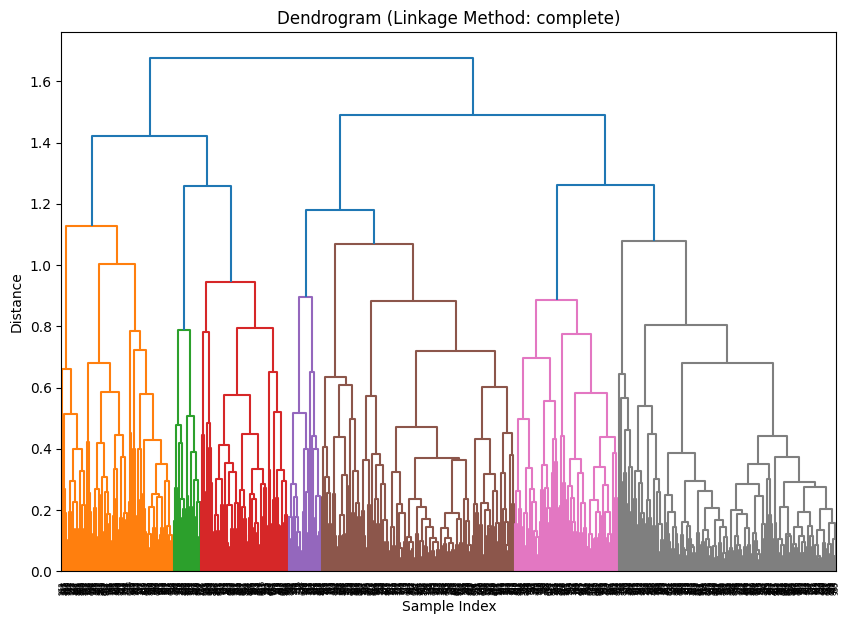

In [327]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="complete")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: complete)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Visualisasi dendrogram digunakan untuk menunjukkan struktur hierarki proses penggabungan cluster.

##Average Linkage

In [328]:
# train agglomerative clustering with 5 clusters, linkage="average"
from sklearn.cluster import AgglomerativeClustering
agg_clus_average = AgglomerativeClustering(n_clusters=2,linkage="average")
agg_clus_average.fit(customer_scaled)

AgglomerativeClustering(linkage='average')

Hierarchical Clustering dilakukan menggunakan metode linkage average, yang menghitung rata-rata jarak dari seluruh pasangan titik antar cluster, dan dibentuk menjadi 5 cluster

In [329]:
# assign clusters to customer dataframe
customer_scaled_df["label_average"] = agg_clus_average.labels_
customer_scaled_df.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,label_single,label_complete,label_average
0,0.030769,0.346991,0.981481,0.619377,0,0,0
1,0.061538,0.000000,0.981481,0.892734,0,0,0
2,0.030769,0.340017,0.932099,0.965398,0,0,0
3,0.800000,0.348753,0.154321,0.356401,1,1,1
4,0.707692,0.000000,0.271605,0.391003,1,1,1


Label hasil cluster disimpan dalam kolom label_average

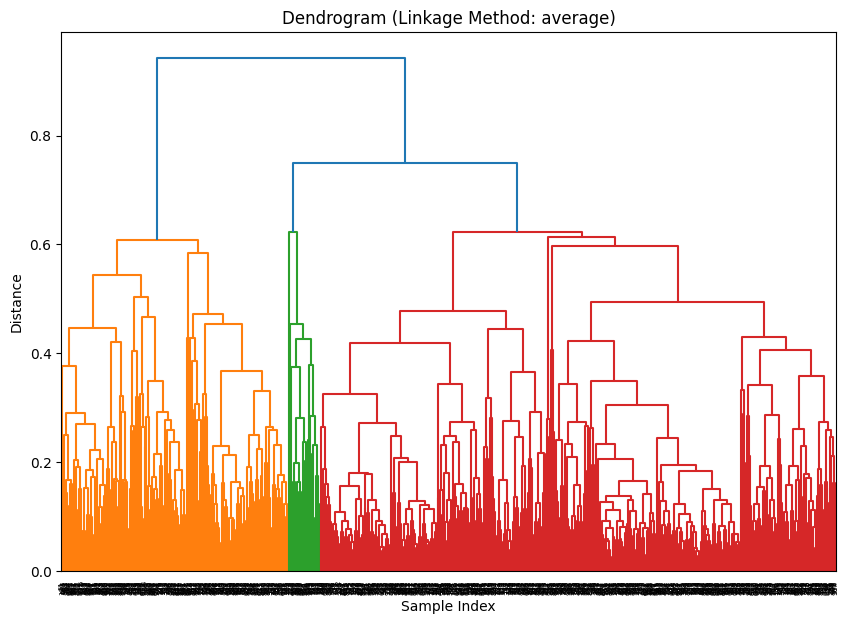

In [330]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="average")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: average)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Visualisasi dendrogram digunakan untuk menunjukkan struktur hierarki proses penggabungan cluster.

##Ward Linkage

In [331]:
# train agglomerative clustering with 5 clusters, linkage="ward"
from sklearn.cluster import AgglomerativeClustering
agg_clus_ward = AgglomerativeClustering(n_clusters=2,linkage="ward")
agg_clus_ward.fit(customer_scaled)

AgglomerativeClustering()

Hierarchical clustering dilakukan dengan metode ward linkage, yaitu menggabungkan cluster dengan varian terkecil, dan membentuk 5 cluster.

In [332]:
# assign clusters to customer dataframe
customer_scaled_df["label_ward"] = agg_clus_ward.labels_
customer_scaled_df.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,label_single,label_complete,label_average,label_ward
0,0.030769,0.346991,0.981481,0.619377,0,0,0,0
1,0.061538,0.000000,0.981481,0.892734,0,0,0,0
2,0.030769,0.340017,0.932099,0.965398,0,0,0,0
3,0.800000,0.348753,0.154321,0.356401,1,1,1,1
4,0.707692,0.000000,0.271605,0.391003,1,1,1,1


Label hasil clustering metode ward linkage disimpan pada kolom label_ward.

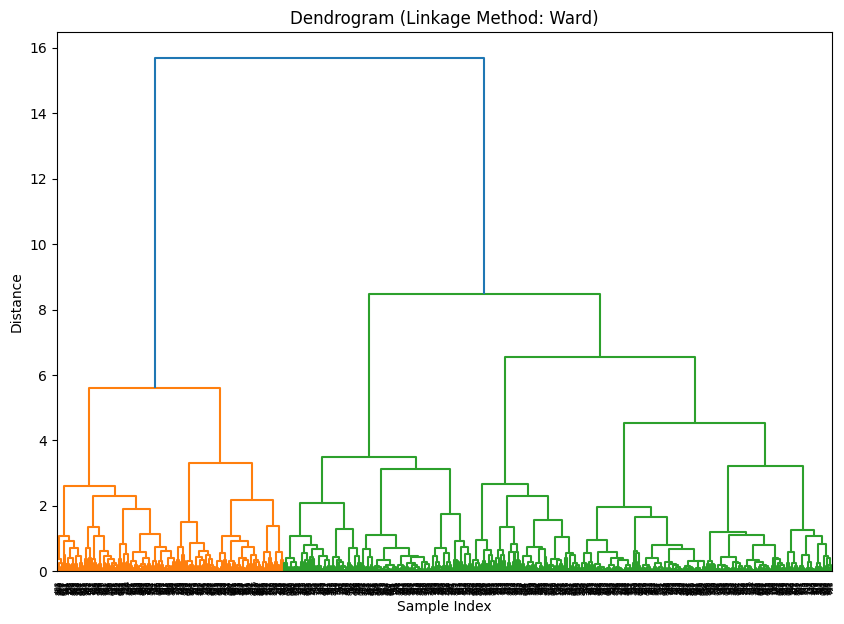

In [333]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Visualisasi dendrogram digunakan untuk menunjukkan struktur hierarki proses penggabungan cluster.

#Cluster Validation

kriteria cluster diukur berdasarkan nilai koefisien Silhoutte pada tabel di bawah ini

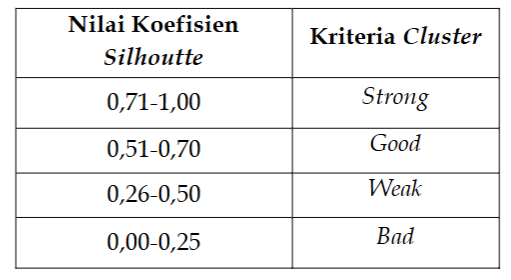

Cluster validation dilakukan
untuk menentukan cluster optimal dengan
melakukan perbandingan nilai validasi untuk memperoleh cluster terbaik.

In [336]:
linkages = ['single','complete','average','ward']
metrics  = ['euclidean','manhattan','canberra']

results = [
    [L, M,
     round(silhouette_score(
           customer_scaled,
           AgglomerativeClustering(
               n_clusters=5, linkage=L, metric=('euclidean' if L=='ward' else M)
           ).fit_predict(customer_scaled),
           metric=M
     ), 2)]
    for L in linkages for M in metrics
]

tabel = (pd.DataFrame(results, columns=['Metode','Jarak','Silhouette'])
         .pivot(index='Metode', columns='Jarak', values='Silhouette')
         .loc[linkages, metrics])

tabel.index  = ['Single Linkage','Complete Linkage','Average Linkage','Ward Linkage']
tabel.columns = ['Jarak Euclidean','Jarak Manhattan','Jarak Canberra']

display(tabel)


,Jarak Euclidean,Jarak Manhattan,Jarak Canberra
Single Linkage,0.26,0.24,0.12
Complete Linkage,0.28,0.26,0.34
Average Linkage,0.31,0.29,0.37
Ward Linkage,0.29,0.30,0.16


Struktur klaster paling stabil dan terpisah dengan baik diperoleh menggunakan metode Average Linkage dan metrik jarak Canberra.
Metode Ward Linkage juga cukup baik jika menggunakan jarak Manhattan. Metode lain cenderung menghasilkan klaster yang kurang kompak atau terlalu menyebar.

# Selesai